Import Dataset

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from scipy.stats import randint
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

In [98]:
# Import NBA_train dataset
NBA_train = pd.read_csv('../data/processed/NBA_train_cleaned.csv')
NBA_train.head(10)

,Unnamed: 0,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,...,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,1,75,21.8,10.5,4.2,7.9,55.1,0.0,0.0,34.9,...,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,...,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,...,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,...,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
5,5,88,20.0,8.8,3.7,8.7,43.6,0.0,0.0,6.9,...,2.8,75.1,1.8,2.9,4.7,1.8,0.4,0.3,1.1,1
6,6,70,20.6,7.0,3.2,5.4,58.9,0.1,0.0,0.0,...,1.4,56.7,2.9,4.6,7.6,0.6,0.4,0.7,1.2,1
7,7,57,17.6,5.4,1.7,4.7,37.2,0.9,2.8,33.2,...,1.8,78.3,0.8,1.7,2.6,0.4,0.6,0.6,0.3,1
8,8,46,26.5,9.3,3.1,7.2,44.0,0.6,1.7,27.5,...,2.3,82.1,1.3,2.8,4.1,1.8,0.7,0.6,1.7,1
9,9,64,33.4,16.9,6.4,11.3,59.0,0.3,1.1,0.0,...,4.9,74.9,3.4,8.0,11.9,0.8,0.4,2.5,2.4,1


In [99]:
NBA_train = NBA_train.drop(['Unnamed: 0'], axis=1)  
NBA_train

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,80,24.3,7.8,3.0,6.4,45.7,0.1,0.3,22.6,2.0,2.9,72.1,2.2,2.0,3.8,3.2,1.1,0.2,1.6,1
1,75,21.8,10.5,4.2,7.9,55.1,0.0,0.0,34.9,2.4,3.6,67.8,3.6,3.7,6.6,0.7,0.5,0.6,1.4,1
2,85,19.1,4.5,1.9,4.5,42.8,0.4,1.2,34.3,0.4,0.6,75.7,0.6,1.8,2.4,0.8,0.4,0.2,0.6,1
3,63,19.1,8.2,3.5,6.7,52.5,0.3,0.8,23.7,0.9,1.5,66.9,0.8,2.0,3.0,1.8,0.4,0.1,1.9,1
4,63,17.8,3.7,1.7,3.4,50.8,0.5,1.4,13.7,0.2,0.5,54.0,2.4,2.7,4.9,0.4,0.4,0.6,0.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,32,9.2,1.8,0.7,1.8,40.3,0.0,0.0,23.1,0.4,0.6,65.7,0.3,1.8,1.9,0.5,0.3,0.2,0.4,1
7996,54,6.0,1.8,0.7,1.4,48.7,0.1,0.1,3.1,0.2,0.4,70.1,1.0,1.1,2.0,0.1,0.0,0.3,0.3,1
7997,85,28.2,10.7,4.0,9.0,45.1,0.2,0.6,23.6,2.8,3.9,69.7,1.0,2.1,3.1,3.4,1.2,0.2,1.8,1
7998,39,7.7,2.5,1.0,2.3,40.1,0.0,0.0,13.3,0.6,0.7,74.3,0.4,0.6,0.9,0.2,0.3,0.3,0.5,1


Modelling

Dividing X and Y Columns 

In [100]:
X = NBA_train.drop(['TARGET_5Yrs'], axis=1)
y = NBA_train['TARGET_5Yrs']

Splitting the Dataset

In [101]:
# Split the NBA_train dataset into train and validation dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 8)

# Check the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (6400, 19)
Shape of X_test: (1600, 19)
Shape of y_train: (6400,)
Shape of y_test: (1600,)


Train Initial RandomForest with Default Hyperparameter

In [102]:
rfc = RandomForestClassifier(random_state=8)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=8)

Note: The model is overfitting.

In [103]:
#Calculate the accuracy of the RandomForest on the training and validation sets and print them
print(rfc.score(X_train, y_train))
print(rfc.score(X_test, y_test))

1.0
0.836875


RandomForest Hyperparameter Tuning with Grid Search

In [104]:
#Create a dictionary containing the grid search parameters
hyperparams_grid = {
    'n_estimators'      : np.arange(10,100,20),
    'max_depth'         : np.arange(5, 30, 5),
    'min_samples_leaf'  : np.arange(2, 20, 4),
    'min_samples_split' : [2, 5, 10, 20] 

}
hyperparams_grid

{'n_estimators': array([10, 30, 50, 70, 90]),
 'max_depth': array([ 5, 10, 15, 20, 25]),
 'min_samples_leaf': array([ 2,  6, 10, 14, 18]),
 'min_samples_split': [2, 5, 10, 20]}

In [105]:
# Instantiate a GridSearchCV with the hyperparameter grid and the random forest model
grid_search_rfc = GridSearchCV(rfc, hyperparams_grid, cv=2, verbose=1)
# Fit the GridSearchCV on the training set
grid_search_rfc.fit(X_train, y_train)

Fitting 2 folds for each of 500 candidates, totalling 1000 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': array([ 5, 10, 15, 20, 25]),
                         'min_samples_leaf': array([ 2,  6, 10, 14, 18]),
                         'min_samples_split': [2, 5, 10, 20],
                         'n_estimators': array([10, 30, 50, 70, 90])},
             verbose=1)

In [106]:
# Display the best set of hyperparameters
grid_search_rfc.best_params_

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 30}

In [107]:
print(grid_search_rfc.score(X_train, y_train))
print(grid_search_rfc.score(X_test, y_test))

0.86265625
0.84125


Evaluate performance of best estimator

In [108]:
rfc1 = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=10, min_samples_split=5, min_samples_leaf=2, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
rfc1.fit(X_train, y_train)
y_pred = rfc1.predict(X_test)
accuracy_score(y_test, y_pred)

0.8375

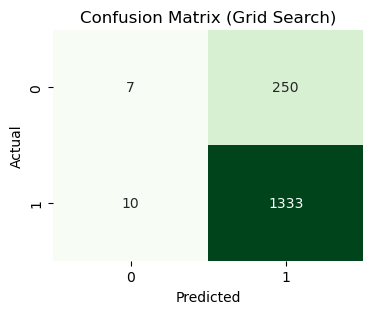

In [109]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Grid Search)')
plt.show()

In [110]:
y_pred_prob = rfc1.predict_proba(X_test)[:,1]
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('ROC_AUC Score: %.3f' % roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.838
Precision: 0.842
F1 Score: 0.911
ROC_AUC Score: 0.669


Hyperparameter Tuning with Random Search

In [111]:
# Define the hyperparameters value randomly
hyperparams_dist = {
    'n_estimators': randint(10, 100),
    'max_depth': randint(5, 30),
    'min_samples_leaf': randint(2, 20),
    'min_samples_split': randint(2, 20)
    }

In [112]:
# Instantiate a KFold with 5 splits
kf_cv = KFold(n_splits=5)

In [113]:
# Instantiate a RandomizedSearchCV with the hyperparameter values and the random forest model
random_search_rfc = RandomizedSearchCV(rfc, hyperparams_dist, random_state=8, cv=kf_cv, verbose=1)
random_search_rfc.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=RandomForestClassifier(random_state=8),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1432eb590>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x143162650>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1432fd0d0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1433f7810>},
                   random_state=8, verbose=1)

In [114]:
# Display the best set of hyperparameters
random_search_rfc.best_params_

{'max_depth': 10,
 'min_samples_leaf': 16,
 'min_samples_split': 19,
 'n_estimators': 25}

In [115]:
print(random_search_rfc.score(X_train, y_train))
print(random_search_rfc.score(X_test, y_test))

0.84015625
0.838125


In [116]:
# Evaluate performance of best estimator
rfc2 = RandomForestClassifier(n_estimators=25, criterion='gini', max_depth=10, min_samples_split=19, min_samples_leaf=16, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

rfc2.fit(X_train, y_train)
y_pred = rfc2.predict(X_test)
accuracy_score(y_pred, y_test)

0.84

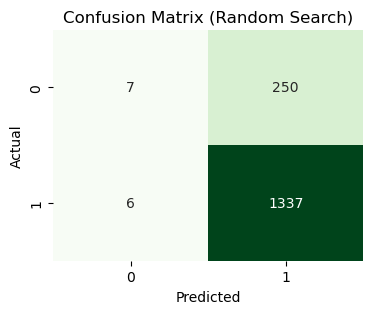

In [117]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Random Search)')
plt.show()

In [118]:
y_pred_prob = rfc1.predict_proba(X_test)[:,1]
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Precision: %.3f' % precision_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))
print('ROC_AUC Score: %.3f' % roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.840
Precision: 0.842
F1 Score: 0.913
ROC_AUC Score: 0.669


Prediction for NBA_test Dataset

In [119]:
# import NBA_train dataset
NBA_test = pd.read_csv('../data/processed/NBA_test_cleaned.csv')
NBA_test.head(10)

,Unnamed: 0,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,0.0,0.9
5,5,59,16.1,7.1,2.8,4.5,62.0,0.0,0.0,3.4,1.7,2.7,58.6,1.8,2.6,4.6,0.6,0.6,0.4,0.9
6,6,45,8.3,3.2,1.4,2.8,46.4,0.0,0.0,8.9,0.5,0.7,69.3,0.5,0.5,1.2,0.2,0.1,0.2,0.4
7,7,53,12.1,4.7,1.8,4.1,44.1,0.1,0.2,25.7,0.9,1.0,80.2,0.6,1.1,1.6,0.8,0.4,0.0,0.6
8,8,41,21.6,7.9,3.1,6.0,49.6,0.3,0.9,0.0,1.8,2.2,77.6,2.4,2.6,5.1,1.4,0.5,0.4,1.4
9,9,25,10.0,2.6,1.0,2.3,45.0,0.2,0.7,11.7,0.4,0.5,84.1,0.4,1.5,1.8,0.4,0.2,0.2,0.5


In [120]:
NBA_test = NBA_test.drop(['Unnamed: 0'], axis=1)  
NBA_test

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV
0,56,9.1,4.0,1.6,3.7,43.7,0.1,0.3,7.3,0.7,1.2,63.4,1.2,0.8,1.7,0.4,0.2,0.3,0.8
1,43,19.3,10.1,3.7,8.1,46.0,0.6,1.7,35.1,1.8,2.5,75.3,0.5,0.9,1.5,3.5,0.6,0.0,1.8
2,82,33.9,11.3,4.9,10.6,45.6,0.5,1.9,44.8,1.8,2.7,71.2,1.3,3.3,4.5,2.5,1.3,0.3,2.0
3,86,44.7,18.8,6.8,15.9,42.9,0.5,1.8,13.5,4.5,6.3,70.9,1.5,3.2,5.0,4.1,0.9,0.1,3.6
4,58,12.3,4.7,1.6,4.0,40.0,0.5,1.7,38.7,1.1,1.3,76.9,0.2,0.6,0.9,1.5,0.5,0.0,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3794,84,21.2,8.7,3.4,6.7,50.2,0.0,0.0,0.0,1.7,2.5,68.1,1.9,2.3,3.9,1.5,0.6,0.3,2.0
3795,49,16.3,6.4,2.9,6.6,44.4,0.0,0.0,19.8,1.0,1.9,50.2,1.7,2.8,4.4,0.4,0.4,0.4,0.7
3796,53,9.9,2.1,0.8,1.8,43.1,0.0,0.0,1.9,0.6,1.0,63.9,0.7,1.0,1.7,0.4,0.4,0.2,0.5
3797,89,38.3,14.5,5.4,11.8,45.2,0.5,1.2,24.7,2.5,2.9,89.2,1.5,4.0,5.5,3.7,1.3,0.3,2.4


In [121]:
# Make predictions for NBA_test 
pred = rfc1.predict(NBA_test)

In [122]:
# Import NBA_sample_submission dataset
NBA_submission = pd.read_csv('../data/raw/NBA_sample_submission.csv') 
NBA_submission

,Id,TARGET_5Yrs
0,0,0.80
1,1,0.32
2,2,0.22
3,3,0.57
4,4,0.19
...,...,...
3794,3794,0.44
3795,3795,0.09
3796,3796,0.05
3797,3797,0.40


In [123]:
NBA_submission ['TARGET_5Yrs'] = pred
NBA_submission

,Id,TARGET_5Yrs
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
3794,3794,1
3795,3795,1
3796,3796,1
3797,3797,1


In [124]:
NBA_submission.to_csv('NBA_submission.csv',index=False)